<a href="https://colab.research.google.com/github/tashfeenMustafa/PCA-Image-Audio-Text-Data/blob/main/DataMining_FinalProject_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with the Training Dataset (Mostly)

## Loading the MNIST Dataset

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading training and testing data of images and labels.

In [ ]:
!pip install idx2numpy

In [ ]:
import os
import idx2numpy
from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/Final_Project/mnist_dataset/'
os.chdir(path)

In [ ]:
# Loading training images and labels
training_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
#cv2_imshow(training_images[4])
training_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [ ]:
training_images = training_images / 255

In [ ]:
print('Shape of training images: {}, Shape of training labels: {}'.format(training_images.shape, training_labels.shape))

Shape of training images: (60000, 28, 28), Shape of training labels: (60000,)


In [ ]:
# Loading training images and labels
testing_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
#cv2_imshow(training_images[4])
testing_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [ ]:
testing_images = testing_images / 255

In [ ]:
print('Shape of testing images: {}, Shape of testing labels: {}'.format(testing_images.shape, testing_labels.shape))

Shape of testing images: (10000, 28, 28), Shape of testing labels: (10000,)


Reshape training and testing images set to (60000 x 784)

In [ ]:
import numpy as np

In [ ]:
training_images_reshaped = np.reshape(training_images, (60000, -1))
training_images_reshaped.shape

(60000, 784)

In [ ]:
testing_images_reshaped = np.reshape(testing_images, (10000, -1))
testing_images_reshaped.shape

(10000, 784)

Shortening the length due to saving space

In [ ]:
training_images_reshaped = training_images_reshaped[:40000]
testing_images_reshaped =  testing_images_reshaped[:8000]

## Working with the training images dataset

### Find average of all training image vectors

In [ ]:
import PIL

In [ ]:
avg_training_image = np.mean(training_images_reshaped, axis=0)
print(avg_training_image.shape)

(784,)


### Show average image

In [ ]:
from matplotlib import pyplot as plt

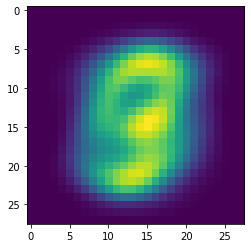

In [ ]:
length, height = training_images[0].shape
avg_im = avg_training_image.reshape((height, length))

plt.imshow(avg_im)

### Calculating demean vector

In [ ]:
demean_training_images = np.subtract(training_images_reshaped, avg_training_image)

In [ ]:
print(demean_training_images.shape)
print(demean_training_images)

(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


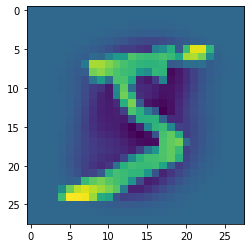

In [ ]:
demean_im_1 = demean_training_images[0].reshape((height, length))

plt.imshow(demean_im_1)

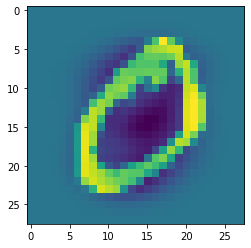

In [ ]:
demean_im_2 = demean_training_images[1].reshape((height, length))

plt.imshow(demean_im_2)

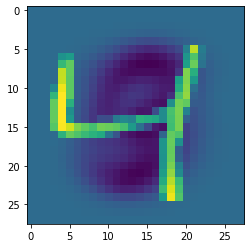

In [ ]:
demean_im_3 = demean_training_images[2].reshape((height, length))

plt.imshow(demean_im_3)

### Calculate Covariance Matrix using A^T.A

In [ ]:
print(np.transpose(demean_training_images).shape)

(784, 60000)


In [ ]:
covariance_matrix = np.cov(demean_training_images.T)

In [ ]:
print(covariance_matrix.shape)
print(covariance_matrix[0].shape)

(784, 784)
(784,)


### Getting Eigenvectors and Eigenvalues of Covariance Matrix

In [ ]:
import scipy.linalg as la
from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eig(covariance_matrix)

In [ ]:
idx = np.argsort(eigenvalues)[::-1]

In [ ]:
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  56,  55,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  73,  72,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  97,  96,  98,  99, 100, 101, 102, 103,
       105, 104, 107, 106, 108, 109, 110, 112, 111, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 135, 134, 136, 137, 138, 140, 139, 141, 142,
       144, 143, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 153,
       156, 157, 158, 159, 161, 160, 162, 163, 165, 164, 166, 168, 167,
       169, 170, 173, 174, 172, 171, 175, 176, 177, 178, 180, 17

In [ ]:
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [ ]:
eigenvectors

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j]])

In [ ]:
eigenvalues

array([ 5.11687301e+00+0.0000000e+00j,  3.74139084e+00+0.0000000e+00j,
        3.25270845e+00+0.0000000e+00j,  2.84162070e+00+0.0000000e+00j,
        2.56711774e+00+0.0000000e+00j,  2.27366339e+00+0.0000000e+00j,
        1.72515498e+00+0.0000000e+00j,  1.52056024e+00+0.0000000e+00j,
        1.45630525e+00+0.0000000e+00j,  1.24275009e+00+0.0000000e+00j,
        1.11208951e+00+0.0000000e+00j,  1.06664054e+00+0.0000000e+00j,
        9.04680833e-01+0.0000000e+00j,  8.92181223e-01+0.0000000e+00j,
        8.32353048e-01+0.0000000e+00j,  7.81900323e-01+0.0000000e+00j,
        6.98386871e-01+0.0000000e+00j,  6.73255811e-01+0.0000000e+00j,
        6.25995240e-01+0.0000000e+00j,  6.07763020e-01+0.0000000e+00j,
        5.62145880e-01+0.0000000e+00j,  5.30798829e-01+0.0000000e+00j,
        5.02780255e-01+0.0000000e+00j,  4.81147033e-01+0.0000000e+00j,
        4.65783200e-01+0.0000000e+00j,  4.42538691e-01+0.0000000e+00j,
        4.28439606e-01+0.0000000e+00j,  4.14618707e-01+0.0000000e+00j,
      

In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(784,)
(784, 784)


In [ ]:
k = 12

eigenvalues = eigenvalues[:k]
print(eigenvalues)

[5.11687301+0.j 3.74139084+0.j 3.25270845+0.j 2.8416207 +0.j
 2.56711774+0.j 2.27366339+0.j 1.72515498+0.j 1.52056024+0.j
 1.45630525+0.j 1.24275009+0.j 1.11208951+0.j 1.06664054+0.j]


In [ ]:
eigenvectors = eigenvectors[:, :k]
print(eigenvectors)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(12,)
(784, 12)


## Representing each training set image vector in the linear combinations of K eigenvectors.

In [ ]:
ytrain = np.dot(demean_training_images, eigenvectors.real)


In [ ]:
ytrain = np.array(ytrain)
print(ytrain.shape)
print(ytrain[0].shape)
print(type(ytrain))

(60000, 12)
(12,)
<class 'numpy.ndarray'>


In [ ]:
ytrain[0]

array([-0.48601015, -1.22617358, -0.09613354, -2.17944297,  0.10704576,
       -0.9116717 ,  0.91763033, -0.62666468, -1.4255491 , -0.77814932,
        0.77449814,  0.9962977 ])

# Working with Testing Dateset

## Find the normalized vector of testing set data by subtracting testing set vectors from average of training set vectors

In [ ]:
demean_testing_images = np.subtract(testing_images_reshaped, avg_training_image)

In [ ]:
print(demean_testing_images.shape)
print(demean_testing_images)

(10000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Representing each testing set image vector in the linear combinations of K eigenvectors.

In [ ]:
import math
ytest = np.dot(demean_testing_images, eigenvectors.real)

In [ ]:
ytest = np.array(ytest)

In [ ]:
ytest.shape

(10000, 12)

# Performing KMeans 

## Running KMeans with the reduced dimensions found from PCA on ytrain

In [ ]:
from sklearn.cluster import KMeans
import time

In [ ]:
# K Clusters
K = 10

start_time = time.time()

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans = KMeans(n_clusters=K, init='random', n_init=K).fit(ytrain)

print("--- %s seconds ---" % (time.time() - start_time))

# the cluster centers or centroids
clusters = kmeans.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations = kmeans.predict(ytrain)

print('Total Number of Clusters: ', len(clusters))
print('Clusters: ', clusters)
print('Clusters Shape: ', clusters.shape)

print('Total Number of points in all clusters: ', len(cluster_affiliations))
print('Cluster Affiliations: ', cluster_affiliations)

--- 9.21998381614685 seconds ---
Total Number of Clusters:  10
Clusters:  [[ 2.65709554 -1.680687    1.0960908   0.38610161  0.38673017  1.2370514
  -0.81642977  0.02809744  0.95856641  0.06792175 -0.63815634  0.29617122]
 [-2.90581537 -0.65784951  2.38889466 -1.29862787  1.25528    -1.06090894
  -0.40949936 -1.05032715  0.59542785 -0.19999987 -0.16926706 -0.02620225]
 [ 0.05535482  2.44239691 -1.34471431  0.67491868 -0.11496546 -0.05048837
  -0.7849654  -0.50485679  0.34486975 -0.7644291  -0.14718225  0.05011623]
 [-0.88982502 -1.77885797 -2.5407657  -0.57041091 -0.48552095 -0.32196429
  -0.22652187 -0.45544874  0.09010155  0.88424305  0.2957071   0.1809734 ]
 [-0.22036881 -0.74851659  0.37587369 -2.04574142 -1.34029004  0.28796377
  -0.46876254  0.7380126  -0.56897265 -0.59912515  0.17846729  0.00534062]
 [-0.883824   -1.02621699  1.12244383  2.00657676 -1.1382445   1.35555201
   0.48009372 -0.81199456 -0.86590337 -0.4786638   0.26667996 -0.22627906]
 [ 0.92077227  2.34303242  0.8743

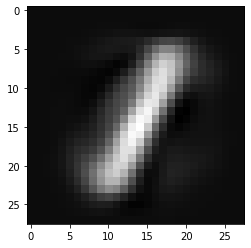

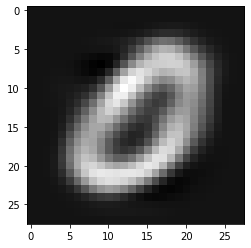

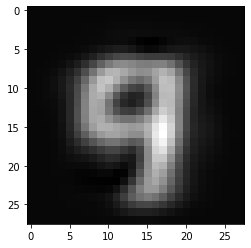

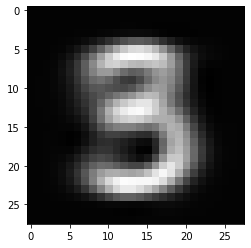

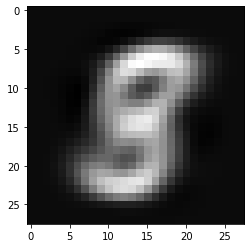

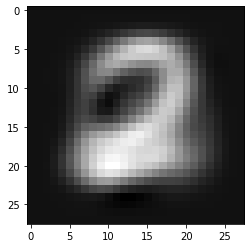

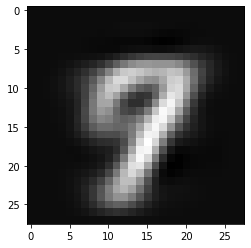

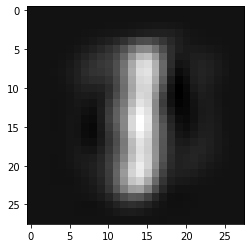

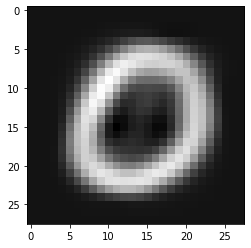

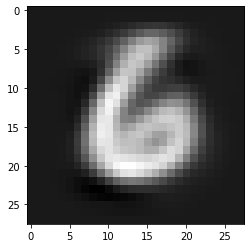

In [ ]:
def show_image(data):
    data = np.reshape(data, (28,28))
    plt.imshow(data, cmap='gray')
    plt.show()

def reconstruct(clusters, eigenvectors, mean):
    centroids = np.dot(clusters, eigenvectors.real.T) + mean
    return centroids


clusters_temp = reconstruct(clusters, eigenvectors, avg_training_image)
for c in clusters_temp:
  show_image(c)


## Running KMeans with the reduced dimensions found from PCA on ytest

In [ ]:
# K Clusters
K = 10

start_time = time.time()

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans = KMeans(n_clusters=K, init='random', n_init=K).fit(ytest.real)

print("--- %s seconds ---" % (time.time() - start_time))

# the cluster centers or centroids
clusters_ytest = kmeans.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations_ytest = kmeans.predict(ytest.real)

print('Total Number of Clusters: ', len(clusters_ytest))
print('Clusters: ', clusters_ytest)
print('Clusters Shape: ', clusters_ytest.shape)

print('Total Number of points in all clusters: ', len(cluster_affiliations_ytest))
print('Cluster Affiliations: ', cluster_affiliations_ytest)

--- 2.986133575439453 seconds ---
Total Number of Clusters:  10
Clusters:  [[-1.5391744   0.59507069  0.80893514  2.61219493 -0.96577345 -1.73465694
   0.82105704  0.75426278 -0.18344861  0.66106332 -0.57143654  0.01643488]
 [ 2.74455869 -1.88577515  0.85954454  0.44865177  0.23960467  1.41987529
  -0.69609923  0.1290865   0.88706153  0.03537719 -0.78587652  0.353814  ]
 [ 0.9475721   2.37969374  0.74639216 -1.16663734  0.09137951  0.69791154
   0.65722707  0.14142107 -0.19644193  0.8701537  -0.04707605 -0.07318712]
 [ 2.83221554 -0.81580349 -0.26883122  0.25898868  1.02906729 -1.04174092
   0.84429461  0.52864378 -0.20433879 -0.43316195  0.75743219 -0.51727383]
 [-0.86143322 -1.2981946   1.2635474   1.71569577 -1.50132642  1.51556733
   0.55106582 -0.88523283 -0.98034783 -0.52331928  0.14077219 -0.10433372]
 [-0.38877619 -0.56397192 -0.36340078 -1.79906809 -1.65329138  0.40754863
  -0.31725659  1.07480218 -0.41692963 -0.61485135  0.05257498  0.13353084]
 [ 0.0933283   2.52591599 -1.43

# Evaluating the quality of the clusters from Kmeans

## Checking quality of the final cluster using J
a) 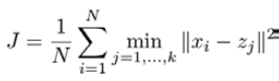

In [ ]:
# N = number of images
N = ytrain.shape[0]

# initialize sum
sum = np.zeros(ytrain.shape[1])

# x = image, z = clusters
for index, v in enumerate(ytrain):
  sum += np.linalg.norm(v - clusters[cluster_affiliations[index]]) ** 2

# calculating J
J = sum / N

# check if all elements in J are same
good = np.all(J == J[0])
print(J)
if good:
  print('Quality Good!')

[14.81716791 14.81716791 14.81716791 14.81716791 14.81716791 14.81716791
 14.81716791 14.81716791 14.81716791 14.81716791 14.81716791 14.81716791]
Quality Good!


## Checking quality of the final cluster using Davies–Bouldin index

b) Davies–Bouldin index
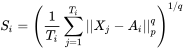

A lower Davies-Bouldin index relates to a model with better 
separation between the clusters. This index signifies the 
average ‘similarity’ between clusters, where the similarity 
is a measure that compares the distance between clusters with 
the size of the clusters themselves. Zero is the lowest possible 
score. Values closer to zero indicate a better partition.

Reference: sklearn documentation

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(ytrain.real, cluster_affiliations)
print('Davies Bouldin Index Score: {}'.format(db_score))

Davies Bouldin Index Score: 1.7745171265224176


## Checking quality of the final cluster using Dunn index
c) Dunn index

It is calculated as the lowest intercluster distance (ie. the smallest distance 
between any two cluster centroids) divided by the highest intracluster distance 
(ie. the largest distance between any two points in any cluster).
The higher the value of the Dunn index, the better the aggregation. 
The number of clusters which maximizes the Dunn index is considered to be the 
optimal number of clusters k. It also has some drawbacks. As the number of 
clusters and the dimensionality of the data increase, so does the cost of computation. 
(Reference: 
1. https://en.wikipedia.org/wiki/Dunn_index 
2. https://python.engineering/dunn-index-and-db-index-cluster-validity-indices-set-1/
3. https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)

In [ ]:
import math

# find euclidean distance between two points 
def find_distance(point, cluster_point):
    distance = math.sqrt(np.sum(np.power(np.subtract(point, cluster_point), 2))) 
    return distance

# find lowest intercluster distance
def get_lowest_intercluster_distance(clusters):
  min_intercluster_distance = float('inf')

  for index_1, cluster_1 in enumerate(clusters):
    for index_2, cluster_2 in enumerate(clusters):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(cluster_1, cluster_2)
        min_intercluster_distance = distance
      
      else:
        if np.any(cluster_1 != cluster_2):
          distance = find_distance(cluster_1, cluster_2)
      
        if distance < min_intercluster_distance:
          min_intercluster_distance = distance
    
    return min_intercluster_distance

# find highest intracluster distance
def get_highest_intracluster_distance(v):
  max_intracluster_distance = float('inf')

  for index_1, point_1 in enumerate(v):
    for index_2, point_2 in enumerate(v):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(point_1, point_2)
        max_intracluster_distance = distance
      
      else:
        if np.any(point_1 != point_2):
          distance = find_distance(point_1, point_2)
      
        if distance > max_intracluster_distance:
          max_intracluster_distance = distance
    
    return max_intracluster_distance

# find dunn index
def dunn_index(ytrain, clusters):
  lowest_intercluster_distance = get_lowest_intercluster_distance(clusters)

  highest_intracluster_distance = get_highest_intracluster_distance(ytrain)

  return lowest_intercluster_distance/highest_intracluster_distance

dunn_index_score = dunn_index(ytrain, clusters)

# Print Dunn Index Score
print('Dunn Index Score: {}'.format(dunn_index_score))


Dunn Index Score: 0.3309609670025041


# Visualizing the Data

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

## Visualizing the Low Dimensional Training Set Data

In [ ]:
x = ytrain[:, 0]
y = ytrain[:, 1]
z = ytrain[:, 2]

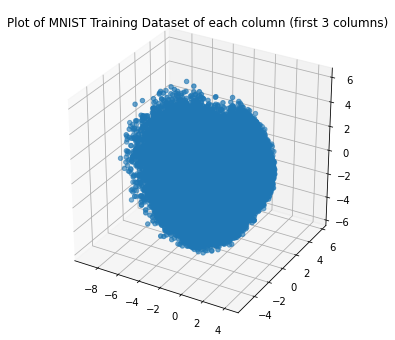

In [ ]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
ax.set_title("Plot of MNIST Training Dataset of each column (first 3 columns)")

plt.show()

## Visualizing Low Dimensional Testing Set Data

In [ ]:
x = ytest[:, 0].real
y = ytest[:, 1].real
z = ytest[:, 2].real

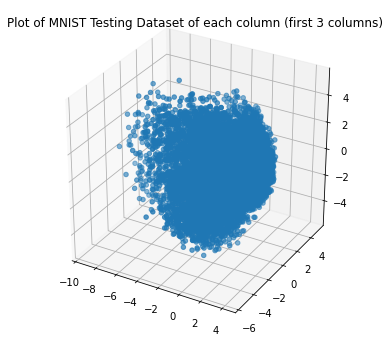

In [ ]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
ax.set_title("Plot of MNIST Testing Dataset of each column (first 3 columns)")

plt.show()

## Plotting the Clusters found from Kmeans (ytrain)

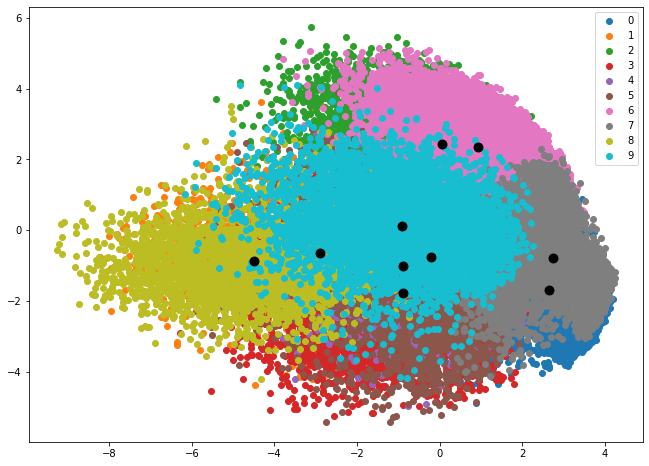

In [ ]:
unique_labels = np.unique(cluster_affiliations)
 
#plotting the results:
fig = plt.figure(figsize=(11, 8)) 
for i in unique_labels:
    plt.scatter(ytrain[cluster_affiliations == i , 0] , ytrain[cluster_affiliations == i , 1] , label = i)
plt.scatter(clusters[:,0] , clusters[:,1] , s = 80, color = 'k')
ax.set_title("2D Plot of Clusters found from KMeans (ytest)")
plt.legend()
plt.show()

## Plotting the Clusters found from Kmeans (ytest)

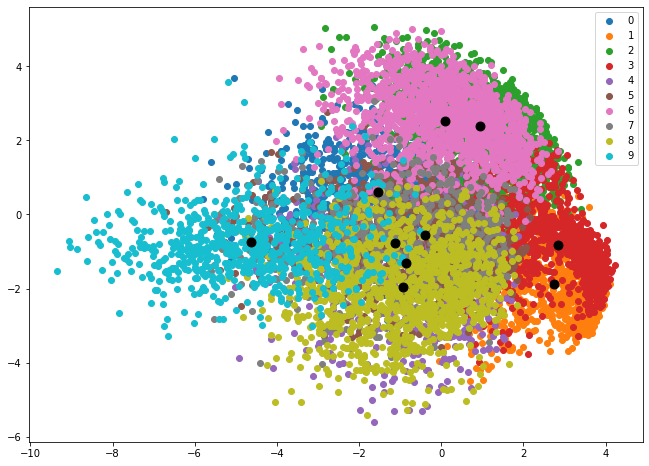

In [ ]:
unique_labels = np.unique(cluster_affiliations_ytest)
 
#plotting the results:
fig = plt.figure(figsize=(11, 8)) 
for i in unique_labels:
    plt.scatter(ytest[cluster_affiliations_ytest == i , 0] , ytest[cluster_affiliations_ytest == i , 1] , label = i)
plt.scatter(clusters_ytest[:,0] , clusters_ytest[:,1] , s = 80, color = 'k')
ax.set_title("2D Plot of Clusters found from KMeans (ytest)")
plt.legend()
plt.show()

## 3D Visualization of the Clusters (ytrain)

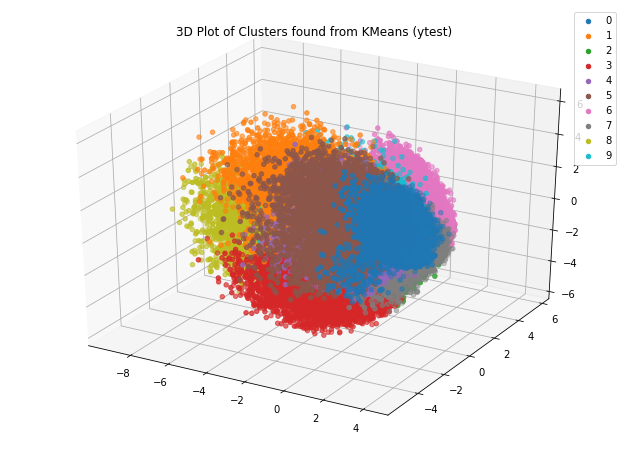

In [ ]:
unique_labels = np.unique(cluster_affiliations)

#plotting the results:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
    ax.scatter(ytrain.real[cluster_affiliations == i , 0], ytrain.real[cluster_affiliations == i, 1], ytrain.real[cluster_affiliations == i, 2], label = i)
ax.scatter(clusters[:, 0] , clusters[:, 1],  clusters[:, 2], s = 80, color = 'k')
ax.set_title("3D Plot of Clusters found from KMeans (ytest)")

plt.legend()
plt.show()

## 3D Visualization of the Clusters (ytest)

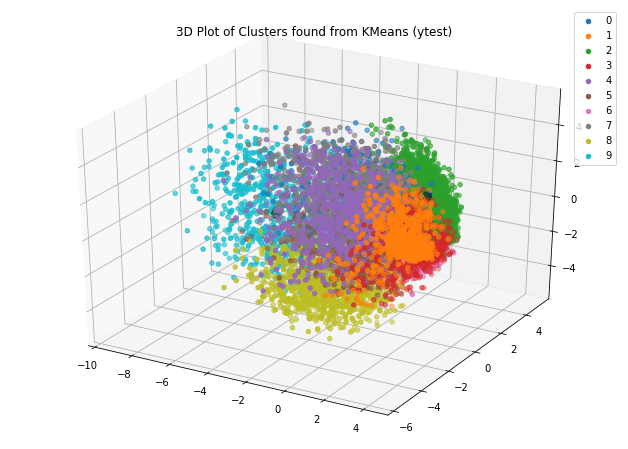

In [ ]:
unique_labels = np.unique(cluster_affiliations_ytest)

#plotting the results:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
    ax.scatter(ytest.real[cluster_affiliations_ytest == i , 0], ytest.real[cluster_affiliations_ytest == i, 1], ytest.real[cluster_affiliations_ytest == i, 2], label = i)
ax.scatter(clusters_ytest[:, 0] , clusters_ytest[:, 1],  clusters_ytest[:, 2], s = 80, color = 'k')
ax.set_title("3D Plot of Clusters found from KMeans (ytest)")

plt.legend()
plt.show()

# Performing SVM

## Performing SVM on original datasets

In [ ]:
from sklearn import svm

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#training_images_reshaped_small = training_images_reshaped[:40000]
#testing_images_reshaped_small = testing_images_reshaped[:40000]


print('Start Time for SVM on MNIST dataset - original dataset - first 1000 rows')
start_time = time.time()

#Train the model using the training sets
clf.fit(training_images_reshaped, training_labels_small)

#Predict the response for test dataset
y_pred = clf.predict(testing_images_reshaped)

print('End Time for SVM on MNIST dataset - original dataset - first 1000 rows')
print("--- %s seconds ---" % (time.time() - start_time))

Start Time for SVM on MNIST dataset - original dataset - first 1000 rows
End Time for SVM on MNIST dataset - original dataset - first 1000 rows
--- 5.137908220291138 seconds ---


### Calculating Accuracy Score of original datasets

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, y_pred))

Accuracy: 0.9245


### Calculating F-1 Score of original datasets

In [ ]:
print("Precision:", metrics.f1_score(testing_labels, y_pred, average='macro'))

Precision: 0.9237432246410646


## Performing SVM on reduced dimension dataset (ytrain)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#ytrain_small = training_images_reshaped[:40000]
#ytest_small = testing_images_reshaped[:40000]
#training_labels_small = training_labels[:12]
#testing_labels_small = testing_labels[:12]

print('Start Time for SVM on MNIST dataset - reduced dataset')
start_time = time.time()

#Train the model using the training sets
clf.fit(ytrain, training_labels)

#Predict the response for test dataset
y_pred = clf.predict(ytest)

print('End Time for SVM on MNIST dataset - reduced dataset')
print("--- %s seconds ---" % (time.time() - start_time))

Start Time for SVM on MNIST dataset - reduced dataset
End Time for SVM on MNIST dataset - reduced dataset
--- 37.15546417236328 seconds ---


### Calculating Accuracy Score of reduced datasets

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, y_pred))

Accuracy: 0.776


### Calculating F-1 Score of reduced datasets

In [ ]:
print("Precision:", metrics.f1_score(testing_labels, y_pred, average='macro'))

Precision: 0.771961814650322
